In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf   #ols
import numpy as np

In [129]:
startups= pd.read_csv("50_Startups.csv")

In [130]:
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [125]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [131]:
startups.isna().sum() 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [132]:
startups=startups.mask(startups==0).fillna(startups.mean())

C:\Users\91705\AppData\Local\Temp/ipykernel_5776/767232455.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  startups=startups.mask(startups==0).fillna(startups.mean())


In [133]:
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2000,136897.80,471784.1000,New York,192261.83
1,162597.7000,151377.59,443898.5300,California,191792.06
2,153441.5100,101145.55,407934.5400,Florida,191050.39
3,144372.4100,118671.85,383199.6200,New York,182901.99
4,142107.3400,91391.77,366168.4200,Florida,166187.94
5,131876.9000,99814.71,362861.3600,New York,156991.12
6,134615.4600,147198.87,127716.8200,California,156122.51
7,130298.1300,145530.06,323876.6800,Florida,155752.60
8,120542.5200,148718.95,311613.2900,New York,152211.77
9,123334.8800,108679.17,304981.6200,California,149759.96


In [54]:
# Correlation Matrix

In [98]:
startups.corr()   

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.268328,0.672626,0.888520
Administration,0.268328,1.000000,-0.068743,0.200717
Marketing Spend,0.672626,-0.068743,1.000000,0.700191
Profit,0.888520,0.200717,0.700191,1.000000


#### here, admin and R&D has positive correlation, Admin and marketing spend are negatively correlated, Admin and  profit are possitively correlated.
#### Marketing spend annd R&D has the highest correlation. ,Marketing and admin team are not correlated, profit and marketing also has highest correlation. 
#### Profit and R&D are highly correlated. 

In [56]:
# Scatterplot between variables along with histograms

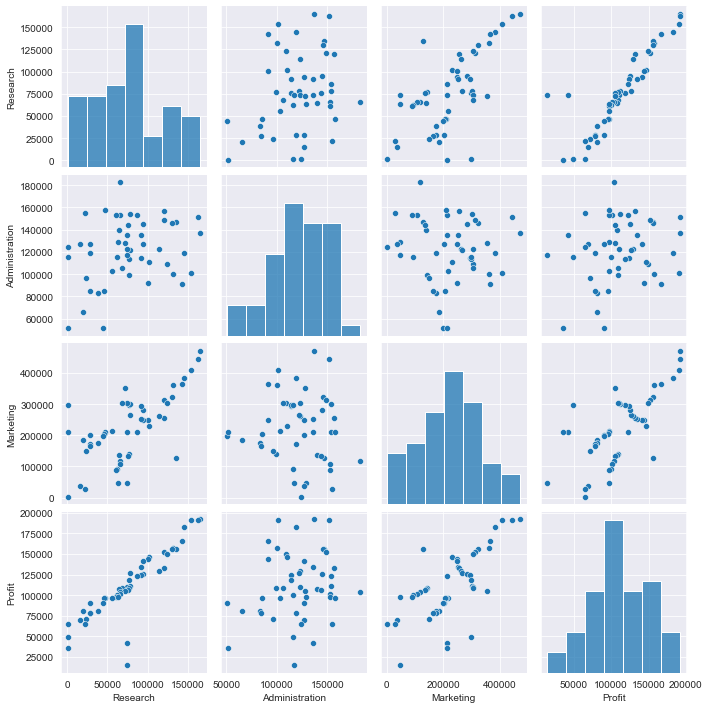

In [57]:
sns.set_style(style='darkgrid')    # to show grids 
sns.pairplot(startups) 

In [58]:
# Preparing a model

In [103]:
startups.rename(columns = {'R&D Spend' : 'Research', 'Marketing Spend' : 'Marketing'}, inplace = True)

In [104]:
startups

,Research,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [105]:
import statsmodels.formula.api as smf 
# x = cars['Marketing'].tolist()
# y = cars['Administration'].tolist()


In [ ]:
model = smf.ols('Profit~Research+Marketing+Administration',data=startups).fit()                    # before ~ y values mpg is dependent  endog and x is exog

In [106]:
model.params   #actual estimate

Intercept         40366.992187
Research              0.703634
Marketing             0.070570
Administration        0.015854
dtype: float64

In [107]:
print(model.tvalues, '\n', model.pvalues)                                                     # probability of intercept and t value 

Intercept         2.961348
Research          7.851717
Marketing         2.067679
Administration    0.154262
dtype: float64 
 Intercept         4.832171e-03
Research          4.896465e-10
Marketing         4.432159e-02
Administration    8.780777e-01
dtype: float64


In [108]:
(model.rsquared,model.rsquared_adj) # adjusted r square- validation of r square

(0.8087722112653937, 0.7963008337392237)

In [109]:
# Simple Linear Regression Models

In [110]:
ml_v=smf.ols('Profit~Marketing',data = startups).fit()    #  individual comparision
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    5.792924
Marketing    6.794632
dtype: float64 
 Intercept    5.185848e-07
Marketing    1.518580e-08
dtype: float64


In [111]:
ml_w=smf.ols('Profit~Administration',data = startups).fit()     #  individual comparision
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [112]:
ml_wv=smf.ols('Profit~Administration+Marketing',data = startups).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)     # this should mot happen as probaility value 0.62>0.05

Intercept         0.478425
Administration    2.556302
Marketing         7.334431
dtype: float64 
 Intercept         6.345658e-01
Administration    1.387074e-02
Marketing         2.547360e-09
dtype: float64


In [113]:
# Calculating VIF

In [114]:
rsq_ad = smf.ols('Administration~Marketing+Research',data=startups).fit().rsquared    # make /chnge the dependent variable
vif_ad = 1/(1-rsq_ad) # 16.33

rsq_mr = smf.ols('Marketing~Administration+Research',data=startups).fit().rsquared  
vif_mr = 1/(1-rsq_mr) # 564.98

rsq_re = smf.ols('Research~Marketing+Administration',data=startups).fit().rsquared  
vif_re = 1/(1-rsq_re) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['Research','Marketing','Administration'],'VIF':[vif_ad,vif_mr,vif_re]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Research,1.227650
1,Marketing,2.080554
2,Administration,2.231382


#### here VIF value is less than 20, so it is ok

In [116]:
## Test for Normality of Residuals (Q-Q Plot)

C:\Users\91705\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


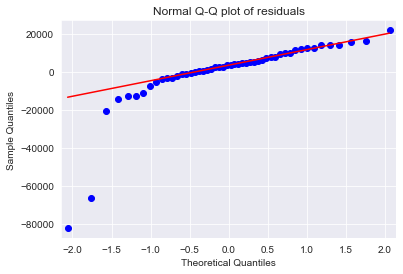

In [117]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [118]:
list(np.where(model.resid<-60000))    # detect outliers

[array([47, 49], dtype=int64)]

In [79]:
## Residual Plot for Homoscedasticity

In [80]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

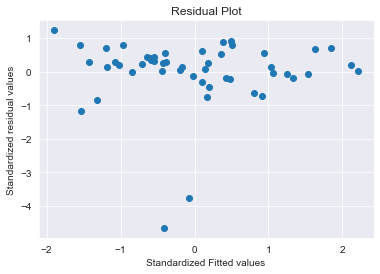

In [81]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

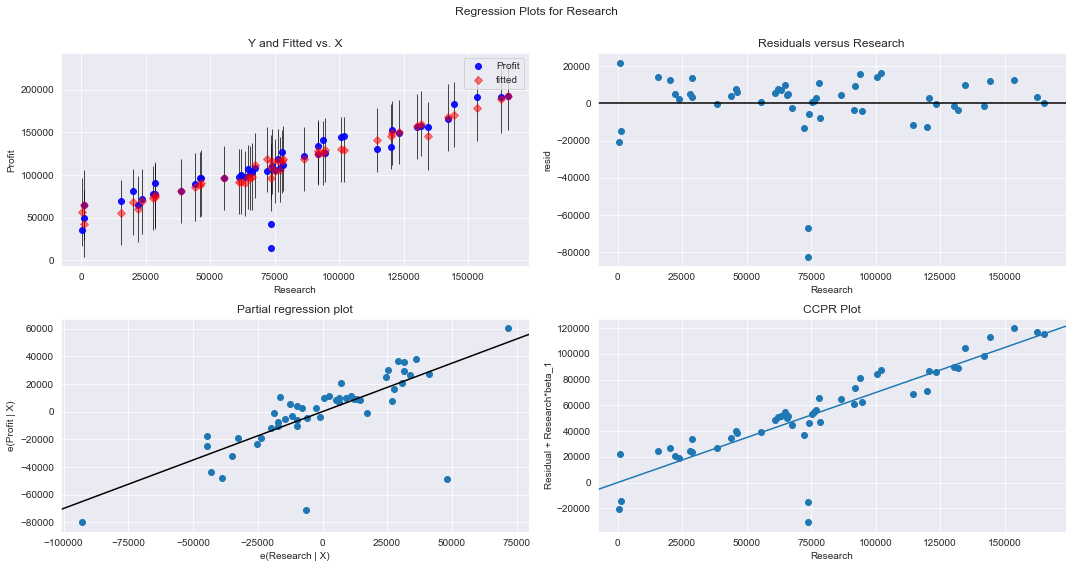

In [82]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Research", fig=fig)
plt.show()

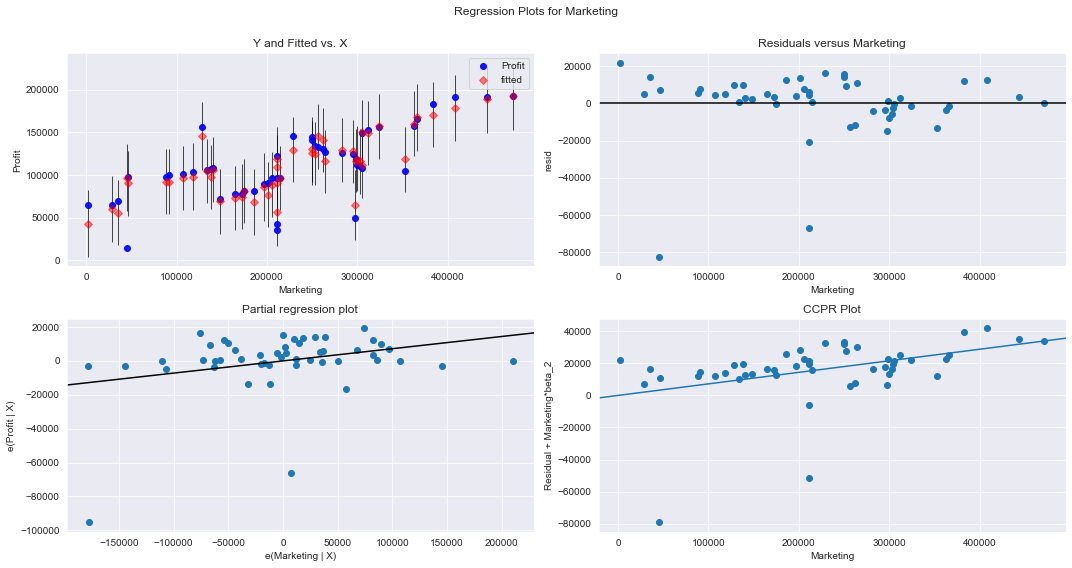

In [83]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

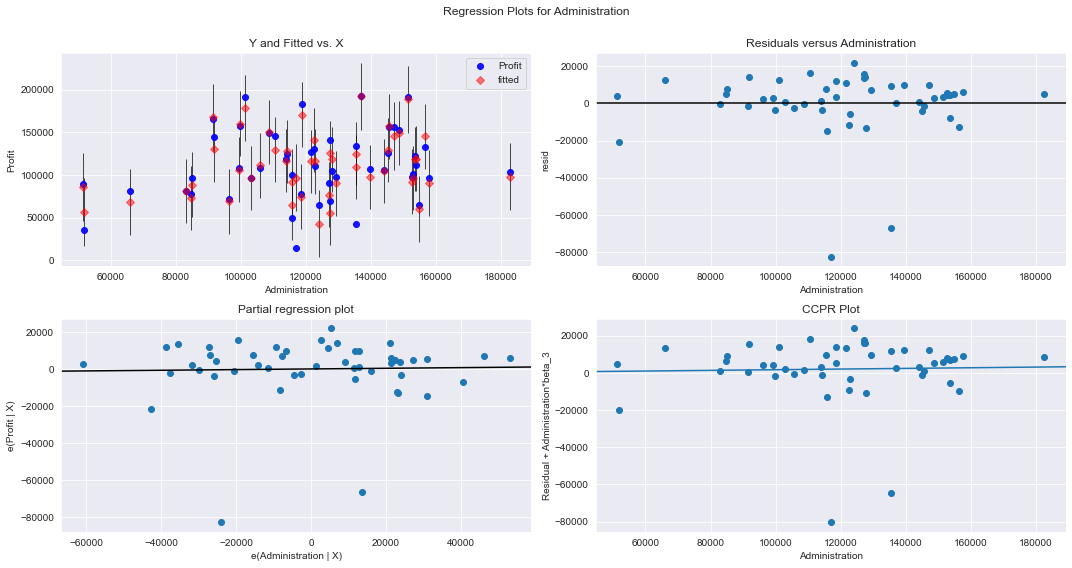

In [84]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [87]:
# Model Deletion Diagnostics
## Detecting Influencers/Outliers

In [88]:
## Cook’s Distance

In [89]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance    # blank values is the probability values

In [90]:
c

array([4.38482882e-07, 1.43962199e-03, 1.72705490e-02, 1.01241839e-02,
       1.98284970e-04, 7.77049319e-04, 1.93909067e-02, 1.02826543e-04,
       3.38893518e-04, 1.37722800e-05, 9.38342412e-03, 1.14776438e-02,
       4.46188102e-03, 1.82631561e-03, 8.53757590e-03, 4.18659858e-03,
       2.45286272e-03, 5.48222835e-04, 2.55896539e-04, 7.13828880e-04,
       6.73163868e-05, 5.09817687e-03, 1.17577732e-03, 2.49356475e-04,
       4.56334990e-04, 3.01675761e-03, 2.06100900e-05, 1.54049215e-02,
       3.66258783e-03, 1.19679877e-03, 3.47898089e-03, 1.98577374e-03,
       4.87769210e-03, 7.81196470e-06, 3.59686091e-03, 2.98035621e-03,
       1.15491186e-02, 2.44080991e-03, 1.67436086e-02, 1.33632523e-06,
       5.05578942e-04, 1.37302001e-03, 3.01275730e-04, 1.46701969e-02,
       2.54271067e-03, 4.92294378e-02, 6.91911011e-02, 9.24728670e-02,
       9.06492844e-02, 8.84733192e-01])

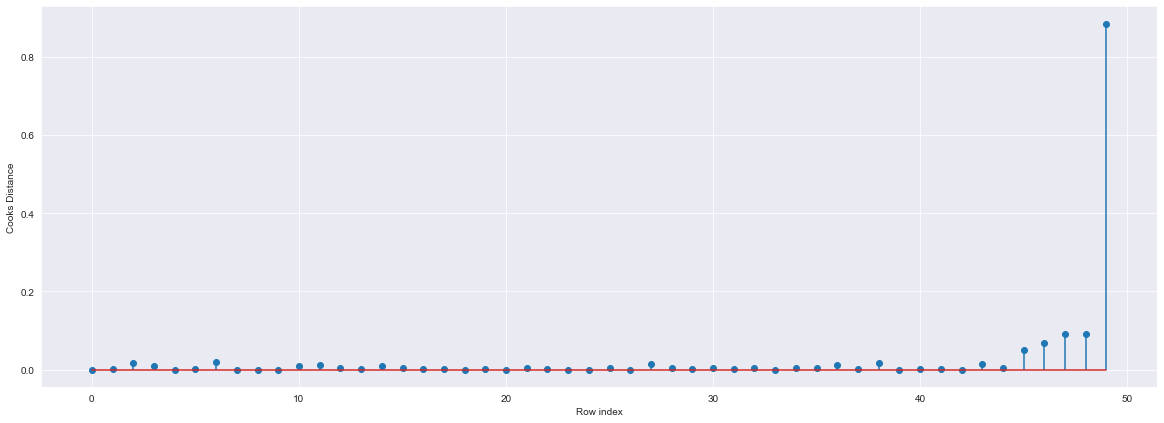

In [119]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [120]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) 

(49, 0.8847331924662493)

In [121]:
## High Influence points

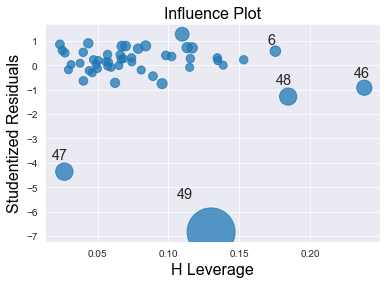

In [122]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [135]:
k=startups.shape[1]
n=startups.shape[0]
leverage_cutoff =3*((k+1)/n)
leverage_cutoff 

0.36

In [136]:
#### From the above plot, it is evident that data point 47 and 49 are the influencers

In [137]:
startups[startups.index.isin([47,49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,73721.6156,135426.92,211025.0978,California,42559.73
49,73721.6156,116983.80,45173.0600,California,14681.40


In [138]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [139]:
# Improving the model

In [242]:
#Load the data
startups_new = pd.read_csv("50_Startups.csv")
startups_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [246]:
startups_new.rename(columns = {'R&D Spend' : 'Research', 'Marketing Spend' : 'Marketing'}, inplace = True)

In [247]:
startups1 = startups_new.drop(startups_new.index[[47,49]],axis=0).reset_index()
startups1.head()

,index,Research,Administration,Marketing,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [248]:
startups1=startups1.drop(['index'],axis=1)

In [249]:
startups1

,Research,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [250]:
startups1.rename(columns = {'R&D Spend' : 'Research', 'Marketing Spend' : 'Marketing'}, inplace = True)

In [251]:
# Build Model

In [252]:
#Exclude variable "Administration" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit ~ Research+Marketing',data = startups1).fit()

In [253]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9588424786144887, 998.1499506151225)

In [254]:
#Exclude variable "Marketing" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~Research+Administration',data = startups1).fit()

In [255]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9561969836377051, 1001.1401582113729)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'Marketing' and excluding 'Administration' so that multi collinearity problem would be resolved.

In [256]:
# Cook’s Distance

In [257]:
model_influence_V = final_ml_V.get_influence()
(c_V,_)= model_influence_V.cooks_distance

Text(0, 0.5, 'Cooks Distance')

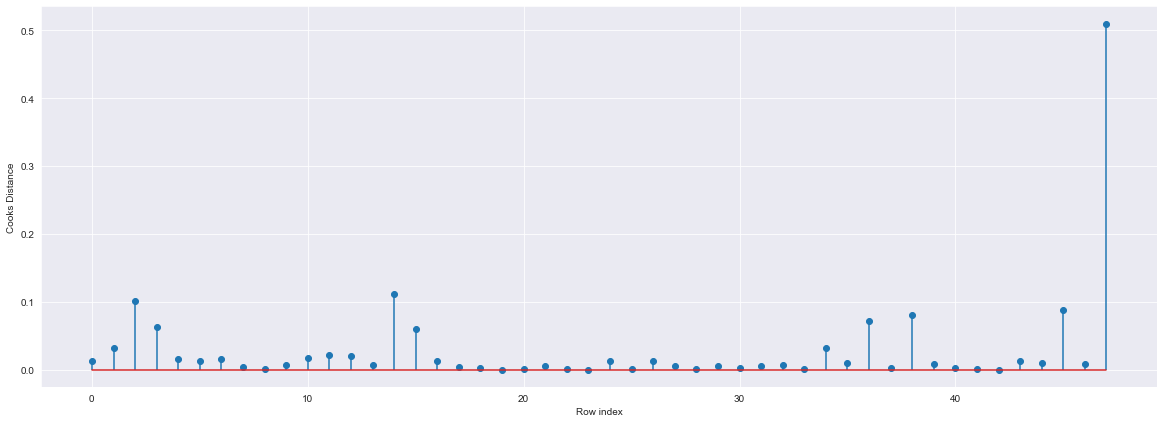

In [258]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups1)),np.round(c_V,3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

In [259]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(47, 0.5100225483038299)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [260]:
# Checking the accuracy of the model
final_ml_V= smf.ols('Profit~Research+Marketing',data = startups1).fit()

In [261]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9588424786144887, 998.1499506151225)

In [262]:
## Predicting for new data

In [266]:
#New data for prediction
new_data=pd.DataFrame({'Marketing':40000,"Research":19500},index=[1])   # to recheck

In [267]:
final_ml_V.predict(new_data)

1    66617.098739
dtype: float64

In [265]:
final_ml_V.predict(startups_new.iloc[0:5,])

0    190414.983300
1    187569.641879
2    179569.031205
3    171925.712960
4    169736.413448
dtype: float64

In [269]:
pred_y =final_ml_V.predict(startups_new)

In [270]:
pred_y

0     190414.983300
1     187569.641879
2     179569.031205
3     171925.712960
4     169736.413448
5     161749.590248
6     157791.286490
7     159523.326017
8     151671.906551
9     153657.280272
10    135153.978638
11    134727.050273
12    129471.228889
13    128098.875323
14    149785.901664
15    145736.032201
16    117603.783597
17    130929.503256
18    129002.388788
19    117268.913221
20    117131.429622
21    118808.561954
22    115506.701296
23    110553.236211
24    113658.490835
25    104029.958393
26    112165.291040
27    115337.243586
28    104589.276086
29    103960.414077
30    100758.045015
31    100020.059190
32    100686.964718
33     98927.308782
34     91824.689347
35     91370.070669
36     77856.313670
37     89649.344849
38     70932.559763
39     84823.620529
40     77194.516037
41     76314.191663
42     72604.813955
43     63416.807591
44     68383.936351
45     51344.972708
46     59213.258675
47     50523.276734
48     50941.925170
49     51690.025313


#### Accuracy of the data is 95% as per the data and prediction